In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

data = pd.read_csv('./titanic/train.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# 데이터에 대한 상관관계를 heatmap을 통해 살펴본다.
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidth=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()
# 상관관계는 하나의 feature가 다른 feature와 연관이 될 때, positive가 될 경우
해당 feature들은 비슷하다라고 판단한다.
# Parch와 SibSp의 관계가 0.41로 높은 positive를 보이고 있다.

SyntaxError: invalid syntax (<ipython-input-5-fb59b7f86ec4>, line 7)

In [7]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)
# 나이를 구간으로 나누어서 16세 이하, 32세 이하, 48세ㅔ 이하, 64세 이하
# , 이상으로 구분한다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2


In [9]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,346
0,277
2,188
3,69
4,11


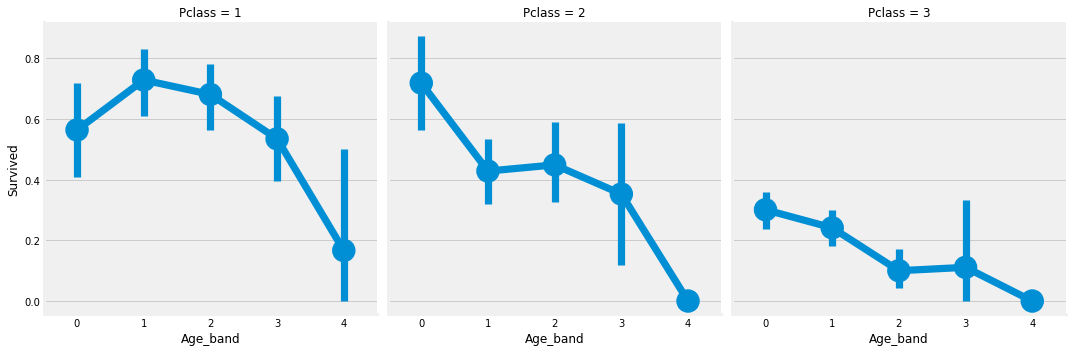

In [11]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

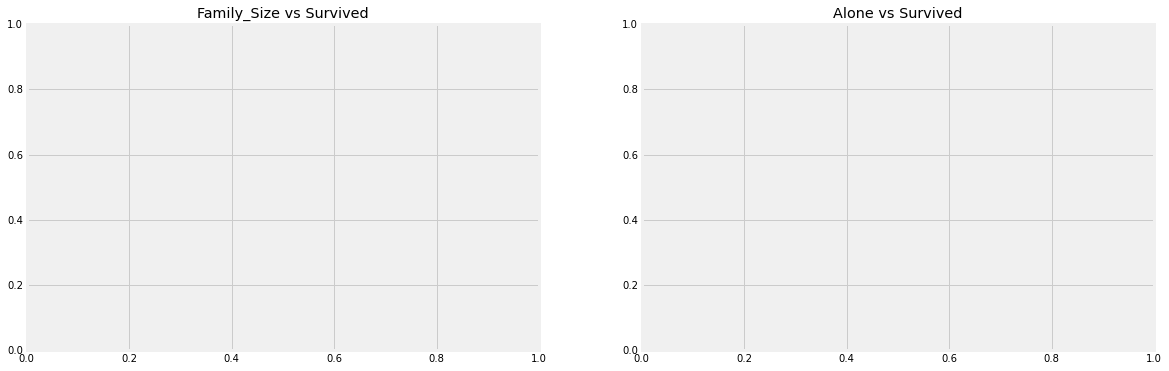

In [13]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()
# 왜 안되는지 모르겠다...

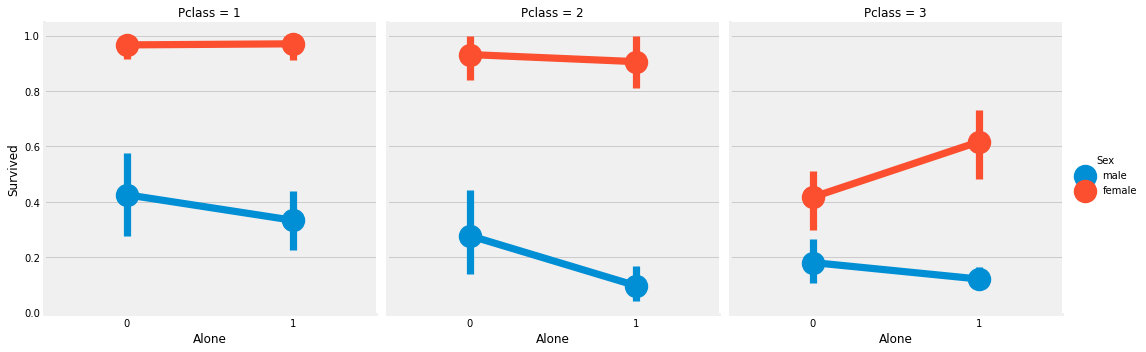

In [15]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()
# 객실의 등급이 높고, 여성이고 혼자인 경우 생존율이 매우 높다.
# 객실의 등급이 낮고, 남성이고 혼자인 경우 생존율이 매우 낮다.

In [17]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
# pandas의 qcut은 값에 따라 split하거나 arrange를 해준다.
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')
# Ticket 가격 역시 연속적으로 이어지는 값이기 때문에 Age와 같이 구간을 정해 분석한다.

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [4]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

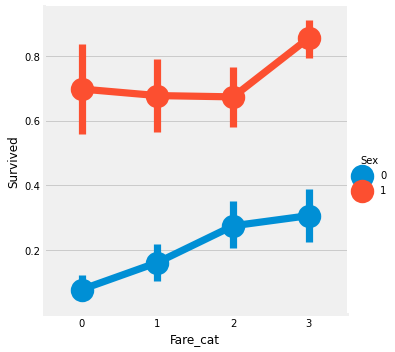

In [10]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()
# 티켓가격이 높고 여성의 경우 생존률이 높다.

In [9]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
# data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],
#                        [0,1,2,3,4],inplace=True)
# Initial이라는 key값을 못가져온다...

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'